<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01685424/blob/main/IBM_DA0101EN_Data_Analysis_with_Python_Mod05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># **IBM Course: DA0101EN**
>**Data Analysis with Python**
> 
> *Fernando Alfredo Rojas Estrella - A01685424*
> 
> **Temas:**
1. Model Evaluation and Refinement 0:22
2. Model Evaluation 7:31
3. Overfitting, Underfitting and Model Selection 4:21
4. Ridge Regression 4:27
5. Grid Search 4:34

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 1

# Análisis exploratorio de datos

# R

import pandas as pd
import numpy as np

URL = "/content/sample_data/california_housing_test.csv"
dfdat = pd.read_csv(URL)
dfdat2 = dfdat
URL2= 'https://themys.sid.uncu.edu.ar/rpalma/R-cran/Herederos.csv'
URL3= "https://themys.sid.uncu.edu.ar/rpalma/R-cran/MDZ_Competitividad.csv"
df = pd.read_csv(URL2, delimiter=';', decimal=b',')

print('Dataframe:\n',dfdat.head(4))
print('\n- - - - - - - - - - - - - - - - - - - - - \n')

Dataframe:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  

- - - - - - - - - - - - - - - - - - - - - 



In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 

# Descripción

# 

import pandas as pd
import numpy as np

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)


# Gradded Review Questions

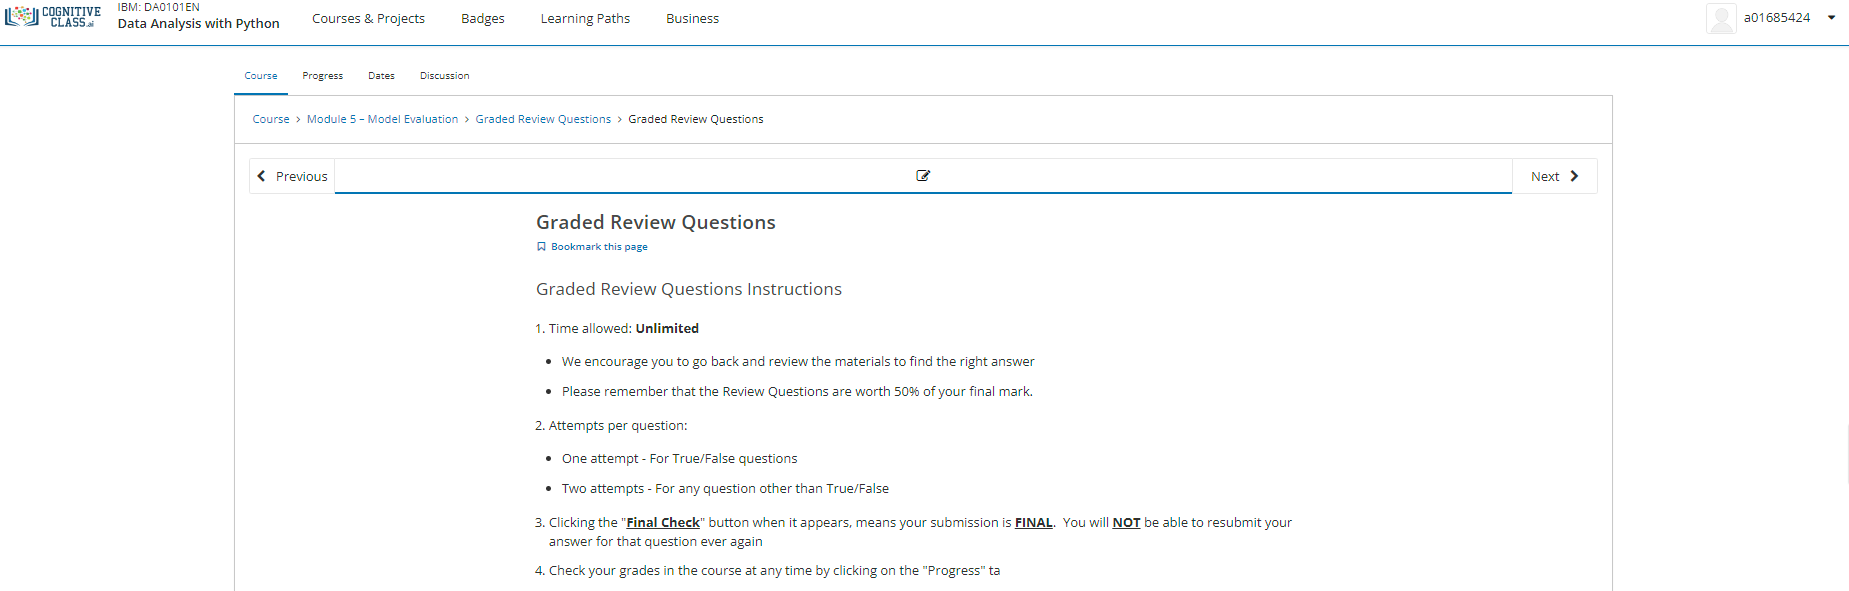

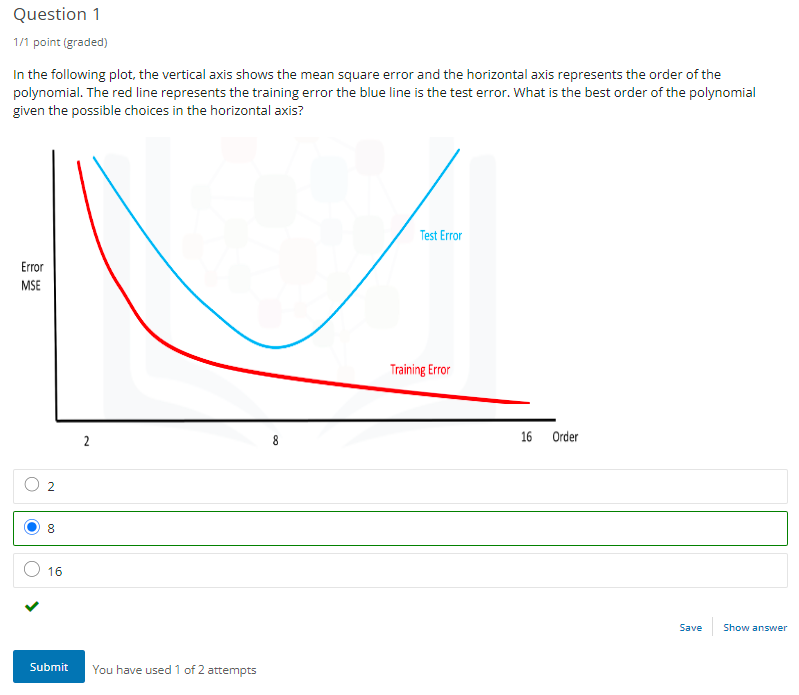

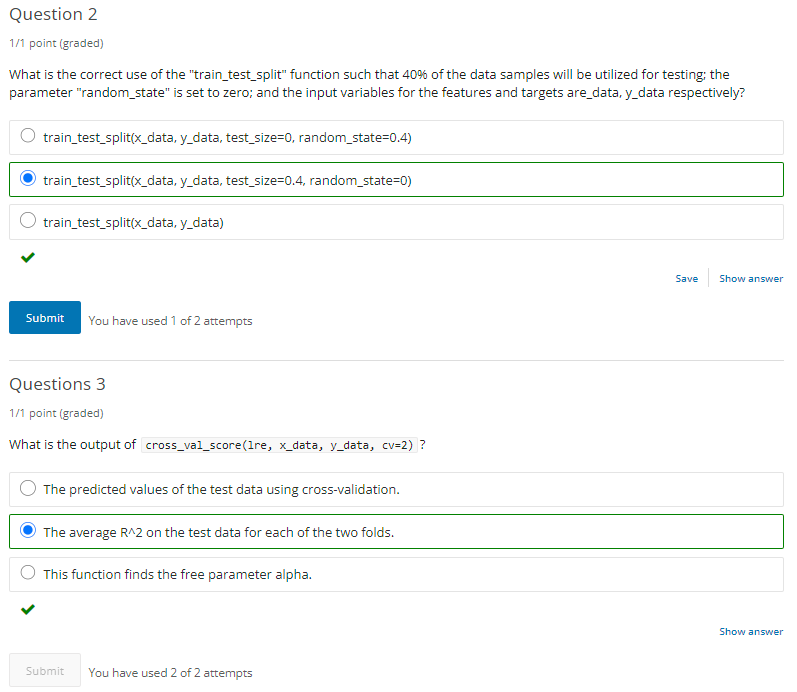

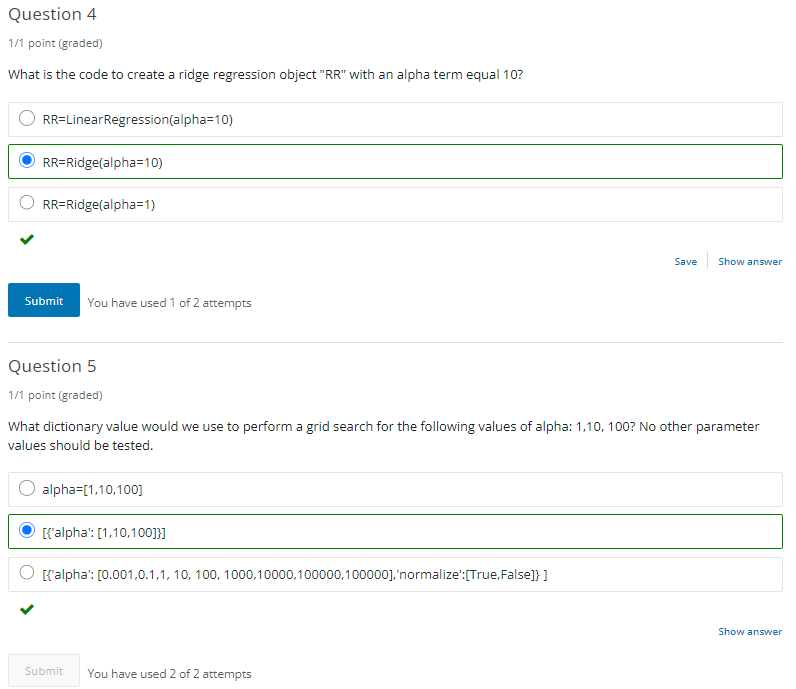


# Progress for a01685424

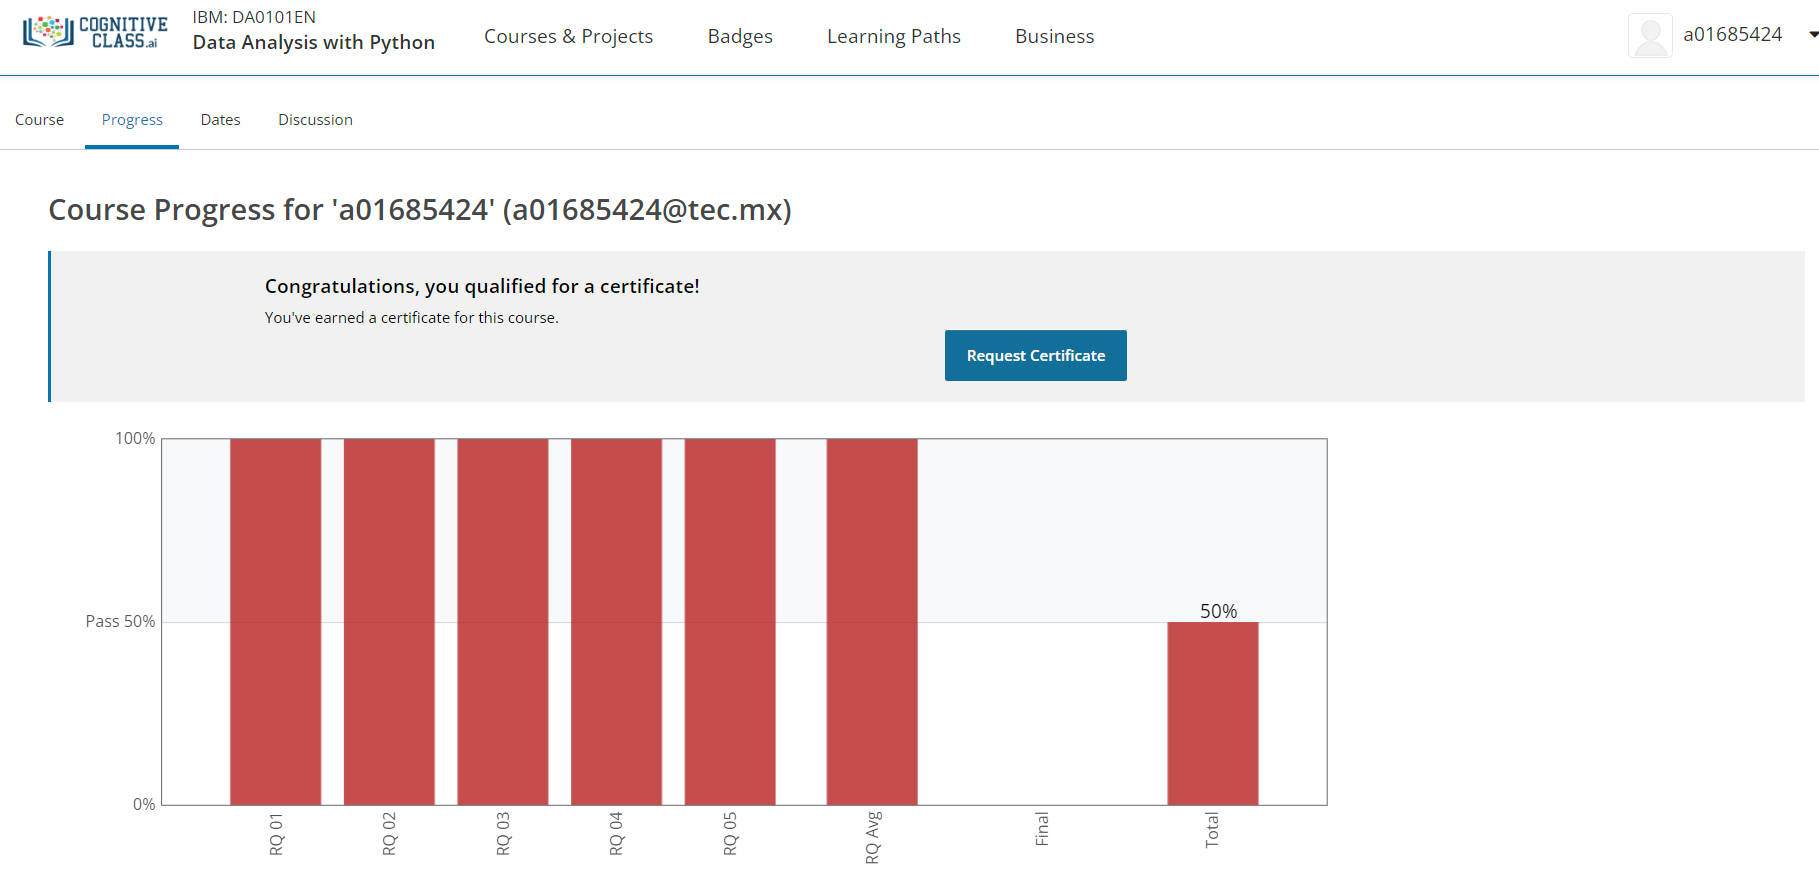